## Day 12: Hot Springs

[(besedilo naloge)](https://adventofcode.com/2023/day/12)

Leta 2023 se je v avtorju Advent of Code prebudil Dostojevski. Če vas zanima celotno besedilo naloge (recimo, ker je moj spodnji opis prehiter), berite original, vendar lahko prvih nekaj poglavij mirno preskočite. Roman postane zanimiv nekje pri odstavku "*In the giant field just outside* ..."

Na kratko in brez zgobice, takole: imamo zaporedje znakov `#` in `.`, poleg tega pa niz števil, ki pove dolžine skupine `#`-ov. Na primer

```
..###..##....###..#. 3,2,3,1
```

Med dvema skupinama je vedno `.`. Zaporedje `####...#` lahko opišemo samo s `4,1`, ne pa `2,2,1` ali `3,1,1`.

Potem pa pokvarimo niz tako, da nekatere znake zamenjamo z vprašaji, na primer

```
.??##?.#?....??????? 3,2,3,1
```

Na koliko načinov je možno zamenjati znake `?` z `#` in `.`, da bo niz ustrezal številkam? Tega na 12.

```
.###...##....###.#..
.###...##....###..#.
.###...##....###...#
.###...##.....###.#.
.###...##.....###..#
.###...##......###.#
..###..##....###.#..
..###..##....###..#.
..###..##....###...#
..###..##.....###.#.
..###..##.....###..#
..###..##......###.#
```

Pa v splošnem?

Naloga na Advent of Code je bila prebrati datoteko s 1000 takšnimi nizi in številkami, za vsakega prešteti na koliko načinov ga je mogoče "popraviti" in to sešteti. Drugi del je spremenjen tako, da postanejo ti nizi res dolgi, dobimo lahko, recimo niz

```
???.??????#?????.##.????.??????#?????.##.????.??????#?????.##.????.??????#?????.##.????.??????#?????.##.
```

s skupinami

```
1,1,7,1,1,2,1,1,7,1,1,2,1,1,7,1,1,2,1,1,7,1,1,2,1,1,7,1,1,2
```

### Rešitev

Tule bomo za začetek napisali funkcijo `ways(line, groups)`, ki prejme niz in seznam števil ter vrne število možnih konfiguracij.

Preden preberete rešitev, predlagam, da poskusite nalogo rešite sami. Tako boste najbolj dojeli, v čem je problem. Priporočam tudi, da pozabite na regularne izraze. Ne pozabite pa na rekurzijo. :)

----

Tole bo čisto lep - zgleden, šolski primer rekurzije. Najprej robni pogoji, s katerimi se rekurzija konča.

Najprej odstranimo začetne pike, saj nas ne zanimajo.

In [1]:
def ways(line, groups):
    line = line.lstrip(".")

Zdaj se lahko zgodi, da je vrstica prazna. Če je prazen tudi seznam `groups`, potem imamo očitno točno eno pravilno konfiguracijo. Če seznam `groups` ni prazen, pa imamo nič možnih konfiguracij - morali bi razporediti še nekaj skupin, a jih nimamo kam.

In [2]:
def ways(line, groups):
    line = line.lstrip(".")
    if not line:
        return not groups

Vrnili smo kar `not groups`. Če ni vel skupin, bo to `True`, kar je enako kot `1`; če so, bo `False`, torej `0`.

Zdaj pa drug primer: kaj če je zmanjkalo skupin. Ker nas ta zanima samo, če še ni zmanjkalo tudi vrstice, bomo nadaljevali kar z `elif not groups`, torej, vrstica ni prazna, skupine pa. Če vrstica vsebuje le še vprašaje in pike, imamo točno eno možno konfiguracijo - vse vprašaje zamenjamo s pikami. Čim vrstica vsebuje kak `#`, pa imamo nič možnih konfiguracij, saj vrstica predvideva nove skupin, skupin pa ni več.

In [3]:
def ways(line, groups):
    line = line.lstrip(".")
    if not line:
        return not groups
    elif not groups:
        return "#" not in line

Tako smo opravili z robnimi pogoji. Zdaj pa rekurzivni del. Ta bo obravnaval dva scenarija: prvi znak vrstice je lahko `?` ali `#`. Pike smo namreč od-`lstrip`-ali na začetku funkcije.

Če je prvi znak `?` je stvar silno preprosta. Zamenjati ga je možno s `#` ali s `.`. Število vseh konfiguracij je enako vsoti konfiguracij, ki se začnejo s `#` in vsoti konfiguracij, ki se začnejo s `.`.

In [4]:
def ways(line, groups):
    line = line.lstrip(".")
    if not line:
        return not groups
    elif not groups:
        return "#" not in line

    if line[0] == "?":
        return ways("#" + line[1:], groups) + ways("." + line[1:], groups)

Če je prvi znak `#`, pa nas prisili, da prav tu začnemo naslednjo skupino. Najprej moramo preveriti, ali je na tem mestu lahko skupina zahtevane dolžine. To zahteva tri pogoje:

- preostanek vrstice mora biti dovolj dolg,
- v toliko znakih vrstice, kolikor je dolga skupina, ne sme biti nobene pike (poleg `#` pa seveda dovolimo tudi vprašaje)
- skupina se mora končati; torej, ostanek niza mora biti dolg natančno toliko, kolikor je dolga skupina, ali pa mora biti znak, ki je za koncem skupine, `.` ali `?`, nikakor ne pa `#`.

Če ti pogoji niso izpolnjeni, se vrstica tu ne more začeti z naslednjo skupino.

In [5]:
def ways(line, groups):
    line = line.lstrip(".")
    if not line:
        return not groups
    elif not groups:
        return "#" not in line

    if line[0] == "?":
        return ways("#" + line[1:], groups) + ways("." + line[1:], groups)
    g0 = groups[0]
    if len(line) < g0 or "." in line[:g0] or (len(line) > g0 and line[g0] == "#"):
        return 0

Če je vse v redu, pa bo ta skupina pač tu, število konfiguracij pa je enako številu konfiguracij brez te skupine - na začetku niza odbijemo toliko znakov, kolikor je dolga ta skupina in še enega zraven (to je potrebno zato, ker bi skupini lahko sledil `?` in nočemo, da bi ga v naslednjem klicu slučajno zamenjali s `#`!), iz seznama skupin pa odstranimo prvo.

In [6]:
def ways(line, groups):
    line = line.lstrip(".")
    if not line:
        return not groups
    elif not groups:
        return "#" not in line

    if line[0] == "?":
        return ways("#" + line[1:], groups) + ways("." + line[1:], groups)
    g0 = groups[0]
    if len(line) < g0 or "." in line[:g0] or (len(line) > g0 and line[g0] == "#"):
        return 0
    return ways(line[g0 + 1:], groups[1:])

Še hitro preverjanje: imamo tri rekurzivne klice. Da se rekurzija ne zacikla, moramo biti z vsakim klicem bližje robnemu pogoju. Je to tu res?

Pri tretjem klicu - očitno: tako vrstica kot seznam skupin sta krajša. Pri prvih dveh - manj očitno. A vendar. Če zamenjamo `?` s `#`, bomo v naslednjem klicu očitno padli v zadnji, tretji klic in ta bo skrajšal vrstico in seznam. Če zamenjamo `?` s `.`, pa jo bo v naslednjem klicu od-`lstrip`-al in tako skrajšal vrstico.

## Deluje že, deluje, ampak počasi

**Kdor se preveč boji matematike, lahko preskoči ta razdelek. Čeprav ... saj ne bo tako huda.**

In [7]:
ways(".??##?.#?....???????", [3, 2, 3, 1])

12

Če je bilo gornje, ročno štetje pravilno, je pravilna tudi funkcija. Je. Prestala je tudi teste na Advent of Code.

No, skoraj. V tej obliki funkcija zmore kratke nize, za one, zverinsko dolge, pa je počasna.

In [8]:
%%timeit

ways("???.??????#?????.##.????.??????#?????.##.????.??????#?????.##.????.??????#?????.##.????.??????#?????.##.",
     [1, 1, 7, 1, 1, 2, 1, 1, 7, 1, 1, 2, 1, 1, 7, 1, 1, 2, 1, 1, 7, 1, 1, 2, 1, 1, 7, 1, 1, 2])

1.41 s ± 7.48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Če za tale niz potrebuje sekundo in pol, bo za 1000 nizov potrebovala pol ure.

Da bomo lažje opazovali, kaj se dogaja, dodajmo štetje klicev. V Pythonu to najpreprosteje naredimo tako, da funkcijo priredimo atribut, recimo `calls` (funkcije v Pythonu so objekti in to takšni, ki jim lahko dodajamo atribute). Funkcija ga bo ob vsakem klicu povečala, mi pa ga bomo pred testiranjem resetirali in po njem izpisali.

In [9]:
def ways(line, groups):
    ways.calls += 1
    
    line = line.lstrip(".")
    if not line:
        return not groups
    elif not groups:
        return "#" not in line

    if line[0] == "?":
        return ways("#" + line[1:], groups) + ways("." + line[1:], groups)
    g0 = groups[0]
    if len(line) < g0 or "." in line[:g0] or (len(line) > g0 and line[g0] == "#"):
        return 0
    return ways(line[g0 + 1:], groups[1:])


def test_ways(line, groups):
    ways.calls = 0
    ways(line, groups)
    return ways.calls

(Nekateri študenti bi to znali narediti še lepše, s splošnejšim dekoratorjem. To vajo prepuščam njim; tule jo bomo preskočili.)

Kolikokrat se funkcija pokliče, če vsebuje niz 12 vprašajev in enega od njih je potrebno zamenjati s `#`.

In [10]:
test_ways("?" * 12, [1])

37

37 ni malo, je pa sprejemljivo in razložljivo - to je trikrat 12 in še en zraven (za konec, ko sta tako seznam kot skupina prazna). Zakaj trikrat? Funkcija za vsak vprašaj funkcija opravi dva klica - enkrat ga zamenja s `?`, enkrat z `#`. Tisti z `#` vodi v samo en klic - skupina je vstavljena, novih skupin ni in robni pogoj konča rekurzijo. Tisti z `.` pa pač nadaljuje "zanko" na ostanku seznama.

Če je torej seznam dolg `n` znakov, bomo imeli $3n + 1$ klicev. Če je seznam dvakrat daljši, bo klicev pač dvakrat toliko (z malo napake zaradi enice).

In [11]:
test_ways("?" * 24, [1])

73

Očitno. Če v $3n + 1$ zamenjamo $n$ z $2n$, dobimo $3(2n) + 1 = 6n+1$.

Kaj pa, če moramo v enako dolg niz postaviti dve skupini dolžine 1?

Tu je računanje malo bolj zoprno. Izkaže se, da bo število klicev enako $3\frac{n(n - 1)}{2} + 4$, a tega nam ni potrebno natančno razumeti, saj si lahko pomagamo s tem, da razmislimo, kako bi skupini razporejali ročno, uganemo obliko formule in jo preverimo tako, da kličemo funkcijo.

Torej, kako bi skupini razporejali ročno? Najprej postavimo prvo čisto na levo, druga bo na enem ob 10 možnih mest (če je niz dolg 12). Nato premaknemo prvo skupino za eno mesto proti desni; druga bo na enem od 9 možnih mest. Nato gre prva še za en korak desno in druga bo na enem od 8 mest. In tako naprej. Različnih razporedov je 10 + 9 + 8 + 7 + 6 + 5 + 4 + 3 + 2 + 1.

In [12]:
ways("?" * 12, [1, 1])

55

V splošnem imamo niz dolžine `n` in število konfiguracij je enako vsoti števil od $1$ do $n - 2$, ki je, kot vemo iz izmišljene anekdote o Gaussu (hvalabogu je to vsaj ena stvar, ki je niso pripisali Einsteinu, ki je zagotovo deležen največjega deleža izmišljenih citatov; v okviru znanosti, seveda - če gre za politiko, je to gotovo rekel Churchill, če za strategiju, Sun Tzu, vse ostalo pa je rekel Mark Twain) enaka $(n - 1)(n - 2)/2$. Tudi če zanemarimo vso šaro koeficientov - polovice, trikratne klice in bogvekaj še, smo prisiljeni ugotoviti tole: rezultat, ki ga vrača funkcija, je sorazmeren kvadratu $n$. Ker funkcija na koncu, čisto na dnu, vedno vrne `0` ali `1` in končni rezultat je samo vsota vseh teh enic, bo morala funkcija za rezultat sorazmeren kvadratu, vrniti $\sim n^2$ enic, kar bo zahtevalo vsaj $n^2$ klicev.

V resnici za niz dolžine 12 potrebuje 202 klicev.

In [13]:
test_ways("?" * 12, [1, 1])

202

Za dvakrat daljši niz potrebuje - ne več dvakrat, temveč štirikrat toliko klicev!

In [14]:
test_ways("?" * 24, [1, 1])

832

Zakaj štirikrat? Število je, vemo, sorazmerno $n^2$. Če v $n^2$ zamenjamo $n$ z $2n$, dobimo $(2n)^n$ je $4n^2$. Štirikrat toliko kot prej.

Za trikrat daljši niz potrebujemo devetkrat toliko klicev in za štirikrat daljši seznam šestnajstkrat toliko klicev.

In [15]:
test_ways("?" * 36, [1, 1])

1894

In [16]:
test_ways("?" * 48, [1, 1])

3388

Vidimo? Začeli smo pri 200 in ko je bilo število klicev dvakrat, trikrat in štirikrat večje, smo dobili štirikratnik, devetkratnih in šestnajstkratnik 200 - približno 800, 1800 in 3200 (plus veliko zaokrožitvene napake).

Tragedija se poglobi, ko vstavljamo tri skupine.

In [17]:
test_ways("?" * 12, [1, 1, 1])

562

In [18]:
test_ways("?" * 24, [1, 1, 1])

5452

In [19]:
test_ways("?" * 36, [1, 1, 1])

19846

In [20]:
test_ways("?" * 48, [1, 1, 1])

48928

Zdaj je število konfiguracij - in s tem število klicev - sorazmerno kubu dolžine niza. Ko se ta podvoji, potroji in početveri, je število klicev 8-krat, 27-krat in 64-krat večje (ne *točno* tolikokrat; tak je trend).

Če pri štirih skupinah število klicev narašča s četrto potenco dolžine niza, pri petih s peto... Število klicev bo torej sorazmerno $n^g$, kjer je $n$ dolžina niza, $g$ pa število skupin. Za takšno zahtevnost pravimo, da je *eksponentna* glede na število skupin. Če si predstavljamo, da imajo daljši niz tudi večje število skupin in je torej $g$ sorazmeren $n$, lahko tu pričakujemo zahtevnost $n^n$. Grozno.

## Kako pospešiti funkcijo?

Zelo preprosto. Preprečiti ji je potrebno, da bi večkrat računala, kar je že izračunala.

Vrnimo se k dvema skupinama.

- Najprej postavi prvo skupino čisto na levo, na prvi znak, in se vpraša, na koliko načinov je možno postaviti preostalo skupino na preostalih deset znakov (drugi je prepovedan).
- Da izve, na koliko načino je možno postaviti skupino na deset znakov, preveri dve možnosti. Bodisi je skupina na prvem (izmed teh desetih) in v tem primeru smo v bistvu končali. Potem pa predpostavi, da *ni* na prvem in naredi rekurzivni klic, da preveri, na koliko načinov je možno postaviti preostalo eno skupino na devet prostih mest.
- ... sledi še precej klicev ...
- Ko kočna z vsemi konfiguracijami, v katerih je prva skupina na prvem znaku, začne s tistimi, v katerih prva skupina *ni* na prvem znaku. Morda je na drugem. V tem primeru mora preveriti vse možne postavitve druge skupine na preostalih devetih znakih. To pa je že delala! Če si zapomni rezultat tega klica, ko smo ga izvedli prvič, ga lahko uporabi, ne da bi dejansko ponovno računala.

Takšnemu pomnjenju rečemo *memoizacija* in v Pythonu ga je preprosto dodati: iz modula `functools` uvozimo dekorator `cache` in ga dodamo pred funkcijo.

In [21]:
from functools import cache

@cache
def ways(line, groups):
    ways.calls += 1
    
    line = line.lstrip(".")
    if not line:
        return not groups
    elif not groups:
        return "#" not in line

    if line[0] == "?":
        return ways("#" + line[1:], groups) + ways("." + line[1:], groups)
    g0 = groups[0]
    if len(line) < g0 or "." in line[:g0] or (len(line) > g0 and line[g0] == "#"):
        return 0
    return ways(line[g0 + 1:], groups[1:])


def test_ways(line, groups):
    ways.calls = 0
    ways.cache_clear()
    ways(line, groups)
    return ways.calls

Dekoriranje bo zahtevalo še dve spremembi. V `test_ways` moramo poklicati `cache_clear`, da funkcija pred vsakim testom pozabi zapomnjeno.

Druga: skupin ne bomo več mogli podajati s seznamom, saj `cache` temelji na slovarju, katerega ključi so argumenti funkcije, pripadajoče vrednosti pa (znani) rezultati. Ker je seznam spremenljiv, ne more nastopati kot ključ. Nič ne de, bomo pač delali s terkami. Funkcije ne bo potrebno spreminjati le klicali jo bomo s terko namesto s seznamom.

Pri eni sami skupini se to ne bo poznalo prav nič. Raje kar takoj pofleksajmo s štirimi (ki se jih prej nismo upali niti dotakniti).

In [22]:
test_ways("?" * 12, (1, 1, 1, 1))

105

In [23]:
test_ways("?" * 24, (1, 1, 1, 1))

249

In [24]:
test_ways("?" * 36, (1, 1, 1, 1))

393

In [25]:
test_ways("?" * 48, (1, 1, 1, 1))

537

Videti je kar lepo. Poskusimo z do desetkrat daljšimi nizi.

In [26]:
ks = [12 * k for k in range(1, 21)]
calls = [test_ways("?" * k, (1, 1, 1, 1)) for k in ks]

print(calls)

[105, 249, 393, 537, 681, 825, 969, 1113, 1257, 1401, 1545, 1689, 1833, 1977, 2121, 2265, 2409, 2553, 2697, 2841]


Pravzaprav: narišimo, pa bomo videli, ali narašča s četrto potenco (očitno ne), kubom, kvadratom ali, morda, celo, linearno.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


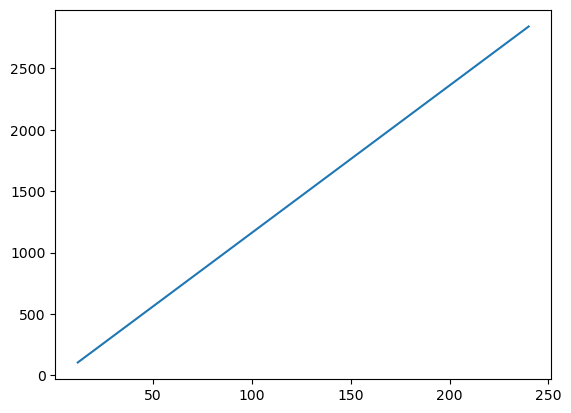

In [27]:
import matplotlib.pyplot as plt

plt.plot(ks, calls)

Črta je tako ravna, da se človek kar ustraši. Poglejmo razmerje med številom klicev in dolžino seznama.

In [28]:
[c / k for c, k in zip(calls, ks)]

[8.75,
 10.375,
 10.916666666666666,
 11.1875,
 11.35,
 11.458333333333334,
 11.535714285714286,
 11.59375,
 11.63888888888889,
 11.675,
 11.704545454545455,
 11.729166666666666,
 11.75,
 11.767857142857142,
 11.783333333333333,
 11.796875,
 11.808823529411764,
 11.819444444444445,
 11.828947368421053,
 11.8375]

Temu rečemo asimptota. Ko je število dolžina seznama dovolj velika, je število klicev enaka dolžini krat 11.83... S podaljševanjem dolžine se bo "ustalilo" vedno več decimalk. (V resnici število klicev leze proti $12n$. Zakaj ravno toliko, se mi ne da računati. Z malo poskušanja pa uvidimo, da je pri `2` skupinah število klicev leze proti $6n$, pri `3` skupinah proti $9n$, pri `4` proti $12n$. Pri $g$ skupinah je število klicev, izgleda $3(g + 1)n$. Odkod $3$ je očitno, odkod $g$ in $n$ tudi, o $+ 1$ pa se mi zdajle ne razmišlja. :)

In [29]:
%%timeit

ways("???.??????#?????.##.????.??????#?????.##.????.??????#?????.##.????.??????#?????.##.????.??????#?????.##.",
     (1, 1, 7, 1, 1, 2, 1, 1, 7, 1, 1, 2, 1, 1, 7, 1, 1, 2, 1, 1, 7, 1, 1, 2, 1, 1, 7, 1, 1, 2))

149 ns ± 0.255 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


Klic, ki je prej potreboval 1,42 s, zdaj potrebuje 148 ns, kar je

In [30]:
f"{1.42 / 148e-9:_}"

'9_594_594.594594594'

-krat (se pravi: skoraj deset milijonkrat) hitreje.

## Mami, jest ne maram rekurzije

Tule je rešitev brez.

`count` bo število najdenih konfiguracij in `to_count` bo seznam situacij, ki jih je potrebno še prešteti. V začetku je to pač `(line, groups)`. 

Za vsako konfiguracijo, ki jo je potrebno prešteti preverimo takšne pogoje kot prej - prej smo jih imenovali "robni". Razlika je le v tem, da zdaj ne vračamo števila konfiguracij, temveč jih prištejemo v `count`.

Sledi tisto, kar so bili prej rekurzivni klici. Tu namesto rekurzivnega klica le dodamo nove konfiguracije v preverjanje.

In [31]:
def ways(line, groups):
    count = 0
    to_count = [(line, groups)]

    while to_count:
        line, groups = to_count.pop()
        line = line.lstrip(".")
        if not line:
            count += not groups
        elif not groups:
            count += "#" not in line
            
        elif line[0] == "?":
            to_count += [("#" + line[1:], groups), ("." + line[1:], groups)]
        else:
            g0 = groups[0]
            if len(line) >= g0 and "." not in line[:g0] and (len(line) == g0 or line[g0] != "#"):
                to_count.append((line[g0 + 1:], groups[1:]))
    return count

Kdor vidi v tem goljufijo, ima kar prav: rekurzijo sem zgolj preoblikoval v iteracijo. Namesto klicev imamo zdaj seznam, v katerem se sčasoma naberejo vsi argumenti, s katerimi bi funkcijo klicali sicer. Ker mi je za vrstni red obravnavanja vseeno, pobiram nove "naloge" s konca seznama, s `pop`; na ta način lahko preprosto odstranjujem elemente iz seznama.

Še več: `to_count` je zelo v sorodu s skladom, na katerega bi Python shranjeval rekurzivne klice. (Vendar samo v sorodu: `to_count` ne vsebuje le "aktivnih" klicev, temveč tudi klice, ki se morajo še zgoditi.)

## Brez rekurzije - zares

Problem gornje funkcije je počasnost: nanjo ne moremo prilepiti `@cache`, tako kot na rekurzivno različico. Če bi jo hoteli pospešiti, bi jo morali sprogramirati povsem drugače, teči bi morala nekako z desne proti levi. To pa se mi, iskreno, ne da. Niti to ni namen teh zapiskov, ki naj bi v osnovi govorili o rekurziji. :)